# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [17]:
data = pd.read_csv(r"C:\Users\leube\Ironhack\cloned_labs\module_2\Lab_2_ Plotting-Multiple-Data-Series\liquor_store_sales.csv")


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

<AxesSubplot:xlabel='ItemType'>

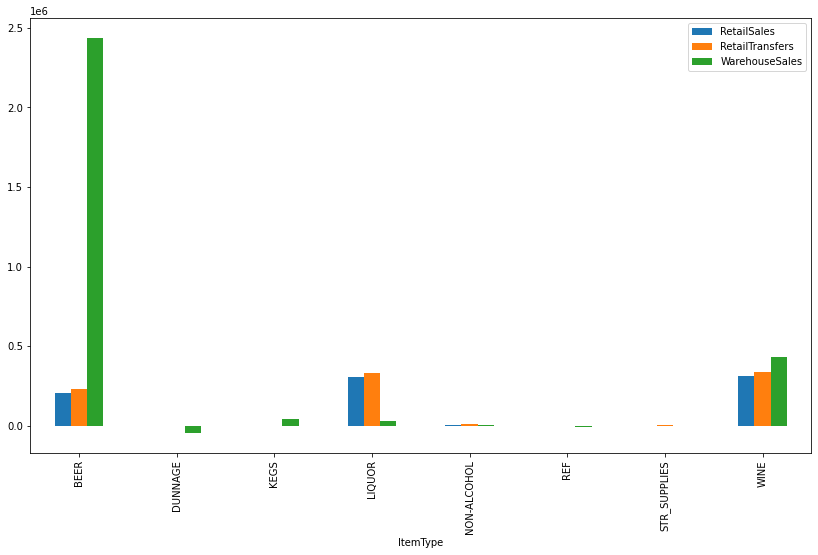

In [8]:
data_ex1 = data[['RetailSales','RetailTransfers','WarehouseSales','ItemType']].groupby(['ItemType']).agg('sum')
data_ex1.plot.bar(figsize=(14,8))

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

Text(0, 0.5, 'Supplier')

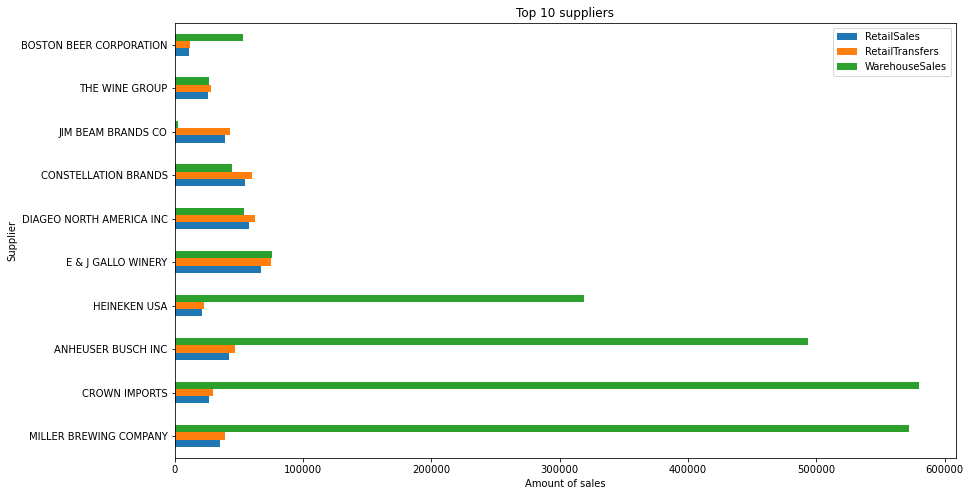

In [52]:
# group by supplier, add all the informtion nedded and calculate their sum
data_ex2 = data[['RetailSales','RetailTransfers','WarehouseSales','Supplier']].groupby(['Supplier']).agg('sum')

# find total sales for the suppliers, add all the columns
data_ex2['Total sales'] = data_ex2.sum(axis=1)

#find top 10 suppliers
top10 = data_ex2.sort_values('Total sales',ascending=False)[:10]
top10

# delete column total sales and start making the horizonal data plot
del top10['Total sales']

top10.plot(kind='barh',figsize=(14,8))
plt.title('Top 10 suppliers')
plt.xlabel('Amount of sales')
plt.ylabel('Supplier')

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [33]:
data.sort_values('Year',ascending=False,inplace=True)

In [43]:
data_ex3 = data[['RetailSales','RetailTransfers','WarehouseSales','Year','Month']].groupby(['Year','Month']).agg('mean')

Text(0, 0.5, 'Average sales')

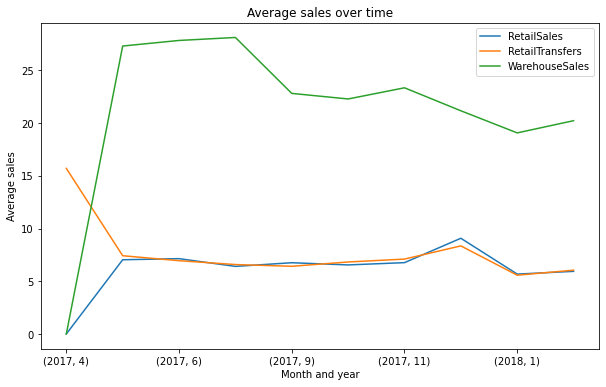

In [51]:
data_ex3.plot(figsize=(10,6))
plt.title('Average sales over time')
plt.xlabel('Month and year')
plt.ylabel('Average sales')

## 4. Plot the same information as above but as a bar chart.

Text(0, 0.5, 'Average sales')

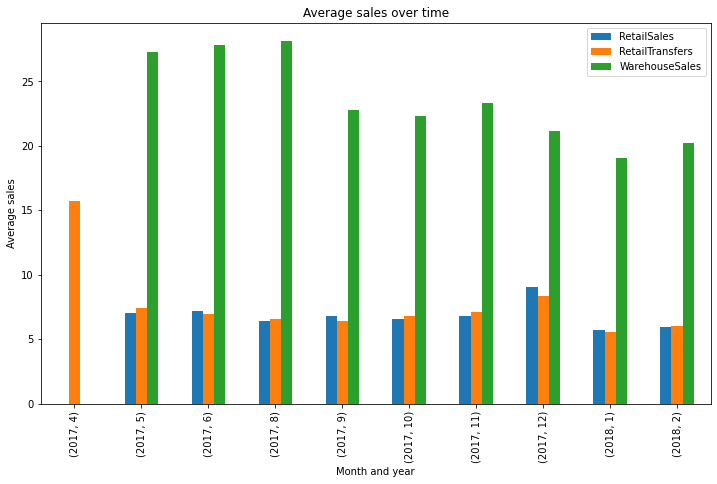

In [49]:
data_ex3.plot(kind='bar',figsize=(12,7))
plt.title('Average sales over time')
plt.xlabel('Month and year')
plt.ylabel('Average sales')

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [56]:
data_ex5 = data[['RetailSales','ItemType','Year','Month']].groupby(['Year','Month','ItemType']).agg('sum')

<AxesSubplot:xlabel='Year,Month'>

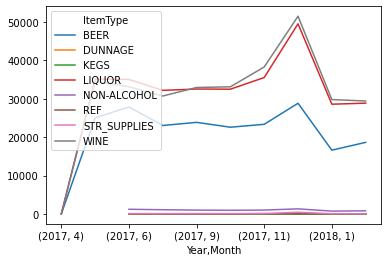

In [66]:
retail_item = pd.pivot_table(data,
                             columns='ItemType',
                             values='RetailSales',
                             index=['Year', 'Month'],
                             aggfunc=sum)
retail_item.plot()

## 6. Plot the same information as above but as a bar chart.

<AxesSubplot:xlabel='Year,Month'>

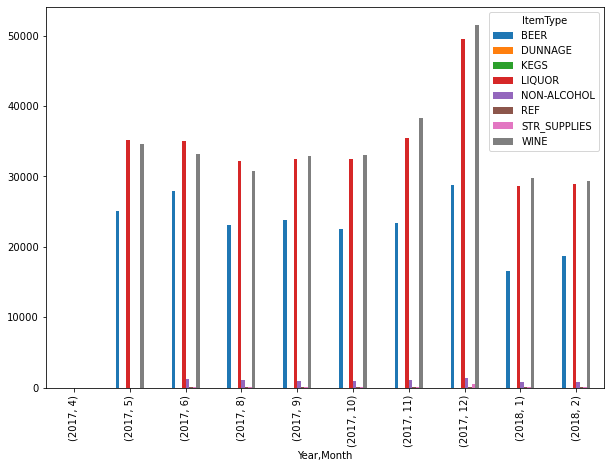

In [69]:
retail_item.plot.bar(figsize=(10,7))

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

Text(0.5, 1.0, 'Relationship Retailsales and -transfers')

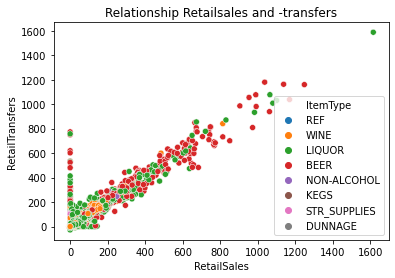

In [73]:
sns.scatterplot(data=data, x="RetailSales", y="RetailTransfers", hue="ItemType")
plt.title('Relationship Retailsales and -transfers')

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

In [74]:
dnum = data.select_dtypes('number')

array([[<AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Month', ylabel='Year'>,
        <AxesSubplot:xlabel='RetailSales', ylabel='Year'>,
        <AxesSubplot:xlabel='RetailTransfers', ylabel='Year'>,
        <AxesSubplot:xlabel='WarehouseSales', ylabel='Year'>],
       [<AxesSubplot:xlabel='Year', ylabel='Month'>,
        <AxesSubplot:xlabel='Month', ylabel='Month'>,
        <AxesSubplot:xlabel='RetailSales', ylabel='Month'>,
        <AxesSubplot:xlabel='RetailTransfers', ylabel='Month'>,
        <AxesSubplot:xlabel='WarehouseSales', ylabel='Month'>],
       [<AxesSubplot:xlabel='Year', ylabel='RetailSales'>,
        <AxesSubplot:xlabel='Month', ylabel='RetailSales'>,
        <AxesSubplot:xlabel='RetailSales', ylabel='RetailSales'>,
        <AxesSubplot:xlabel='RetailTransfers', ylabel='RetailSales'>,
        <AxesSubplot:xlabel='WarehouseSales', ylabel='RetailSales'>],
       [<AxesSubplot:xlabel='Year', ylabel='RetailTransfers'>,
        <AxesSubplot:xlabel

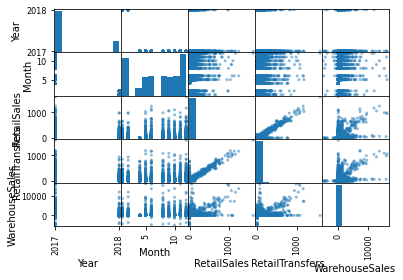

In [75]:
pd.plotting.scatter_matrix(dnum)